# Wrangle Up Them Puppo's 


## Table of Contents
1. [Gathering](#gathering)
2. [Assessing](#assessing)
3. [Cleaning](#cleaning)
4. [Conclusion](#conclusion)
5. [Visualization Code](#visuals)

In [1]:
#Import libraries
import pandas as pd
import re
import tweepy

In [2]:
#Connect to Twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [3]:
#Test API connection and understand the JSON layout of each twitter post
#Inserted random tweet_id from archive
tweet_id = 892420643555336193
tweet = api.get_status(tweet_id, tweet_mode='extended')
print(tweet)

Status(_api=<tweepy.api.API object at 0x7fa83197dc50>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540,

<a id='gathering'></a>
## Gathering

Steps I've taken to compile all data into a single df for analysis and further wrangling:

1. Read in 'twitter-archive-enhanced.csv' as archive_df: This will allow me to pull the specific tweet_id needed
2. Create list of tweet id's
3. Implement an iteration that will loop thought the id list and extract the JSON file from Tweepy all while converting and storing each JSON file on a separate line in 'tweet_json.txt'
4. Iterate through the .txt file to pull tweet_id, retweet_count and favorite_count. Regex will be very useful here
5. While iterating through .txt store varibles in df_list dictionary.
6. Create a pandas DataFrame 'df' from df_list just created
7. Join archive_df and df on tweet_id as df_join
8. Read in 'image-predictions.tsv' as predictions_df
9. Iterate thru predictions_df comparing the tweet_id from df_join while pulling dog type with highest probability only if value is a dog breed (TRUE). 
10. Create df_list of dicitonary items from iteration we can then merge with df_join to create master_df.

We are then going to use a copy of master_df to perform all the assessing and cleaning to create our final df. 

In [4]:
#Read in 'twitter-archive-enhanced.csv'
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

#Understand data structure
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#Import timer
from timeit import default_timer as timer

#Iterate through tweet_id's and append JSON informatin to 'tweet_json.txt'
#Implement count number to track code running visually
count = 0
tweet_id = archive_df.tweet_id.tolist()
start = timer()

for tweet_id in tweet_id:
    count += 1
    
    #Write in try/except function just in case id no longer exists
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        with open('tweet_json.txt', 'a') as file:
            if file is None:
                file.write(str(tweet))
            else:
                file.write('\n{}'.format(tweet))

        print('{} completed, ID: {}'.format(count, tweet_id))
        
    except Exception:
        print('Tweet id: {} no longer exists'.format(tweet_id))
        
end = timer()
print(end - start)

1 completed, ID: 892420643555336193
2 completed, ID: 892177421306343426
3 completed, ID: 891815181378084864
4 completed, ID: 891689557279858688
5 completed, ID: 891327558926688256
6 completed, ID: 891087950875897856
7 completed, ID: 890971913173991426
8 completed, ID: 890729181411237888
9 completed, ID: 890609185150312448
10 completed, ID: 890240255349198849
11 completed, ID: 890006608113172480
12 completed, ID: 889880896479866881
13 completed, ID: 889665388333682689
14 completed, ID: 889638837579907072
15 completed, ID: 889531135344209921
16 completed, ID: 889278841981685760
17 completed, ID: 888917238123831296
18 completed, ID: 888804989199671297
19 completed, ID: 888554962724278272
Tweet id: 888202515573088257 no longer exists
21 completed, ID: 888078434458587136
22 completed, ID: 887705289381826560
23 completed, ID: 887517139158093824
24 completed, ID: 887473957103951883
25 completed, ID: 887343217045368832
26 completed, ID: 887101392804085760
27 completed, ID: 886983233522544640
2

219 completed, ID: 850333567704068097
220 completed, ID: 850145622816686080
221 completed, ID: 850019790995546112
222 completed, ID: 849776966551130114
223 completed, ID: 849668094696017920
224 completed, ID: 849412302885593088
225 completed, ID: 849336543269576704
226 completed, ID: 849051919805034497
227 completed, ID: 848690551926992896
228 completed, ID: 848324959059550208
229 completed, ID: 848213670039564288
230 completed, ID: 848212111729840128
231 completed, ID: 847978865427394560
232 completed, ID: 847971574464610304
233 completed, ID: 847962785489326080
234 completed, ID: 847842811428974592
235 completed, ID: 847617282490613760
236 completed, ID: 847606175596138505
237 completed, ID: 847251039262605312
238 completed, ID: 847157206088847362
239 completed, ID: 847116187444137987
240 completed, ID: 846874817362120707
241 completed, ID: 846514051647705089
242 completed, ID: 846505985330044928
243 completed, ID: 846153765933735936
244 completed, ID: 846139713627017216
245 complete

434 completed, ID: 820690176645140481
435 completed, ID: 820494788566847489
436 completed, ID: 820446719150292993
437 completed, ID: 820314633777061888
438 completed, ID: 820078625395449857
439 completed, ID: 820013781606658049
440 completed, ID: 819952236453363712
441 completed, ID: 819924195358416896
442 completed, ID: 819711362133872643
443 completed, ID: 819588359383371776
444 completed, ID: 819347104292290561
445 completed, ID: 819238181065359361
446 completed, ID: 819227688460238848
447 completed, ID: 819015337530290176
448 completed, ID: 819015331746349057
449 completed, ID: 819006400881917954
450 completed, ID: 819004803107983360
451 completed, ID: 818646164899774465
452 completed, ID: 818627210458333184
453 completed, ID: 818614493328580609
454 completed, ID: 818588835076603904
455 completed, ID: 818536468981415936
456 completed, ID: 818307523543449600
457 completed, ID: 818259473185828864
458 completed, ID: 818145370475810820
459 completed, ID: 817908911860748288
460 complete

650 completed, ID: 792913359805018113
651 completed, ID: 792883833364439040
652 completed, ID: 792773781206999040
653 completed, ID: 792394556390137856
654 completed, ID: 792050063153438720
655 completed, ID: 791821351946420224
656 completed, ID: 791784077045166082
657 completed, ID: 791780927877898241
658 completed, ID: 791774931465953280
659 completed, ID: 791672322847637504
660 completed, ID: 791406955684368384
661 completed, ID: 791312159183634433
662 completed, ID: 791026214425268224
663 completed, ID: 790987426131050500
664 completed, ID: 790946055508652032
665 completed, ID: 790723298204217344
666 completed, ID: 790698755171364864
667 completed, ID: 790581949425475584
668 completed, ID: 790337589677002753
669 completed, ID: 790277117346975746
670 completed, ID: 790227638568808452
671 completed, ID: 789986466051088384
672 completed, ID: 789960241177853952
673 completed, ID: 789903600034189313
674 completed, ID: 789628658055020548
675 completed, ID: 789599242079838210
676 complete

866 completed, ID: 762316489655476224
867 completed, ID: 762035686371364864
868 completed, ID: 761976711479193600
869 completed, ID: 761750502866649088
870 completed, ID: 761745352076779520
871 completed, ID: 761672994376806400
872 completed, ID: 761599872357261312
873 completed, ID: 761371037149827077
874 completed, ID: 761334018830917632
875 completed, ID: 761292947749015552
876 completed, ID: 761227390836215808
877 completed, ID: 761004547850530816
878 completed, ID: 760893934457552897
879 completed, ID: 760656994973933572
880 completed, ID: 760641137271070720
881 completed, ID: 760539183865880579
882 completed, ID: 760521673607086080
883 completed, ID: 760290219849637889
884 completed, ID: 760252756032651264
885 completed, ID: 760190180481531904
886 completed, ID: 760153949710192640
887 completed, ID: 759943073749200896
888 completed, ID: 759923798737051648
889 completed, ID: 759846353224826880
890 completed, ID: 759793422261743616
Tweet id: 759566828574212096 no longer exists
892 

1079 completed, ID: 739485634323156992
1080 completed, ID: 739238157791694849
1081 completed, ID: 738891149612572673
1082 completed, ID: 738885046782832640
1083 completed, ID: 738883359779196928
1084 completed, ID: 738537504001953792
1085 completed, ID: 738402415918125056
1086 completed, ID: 738184450748633089
1087 completed, ID: 738166403467907072
1088 completed, ID: 738156290900254721
1089 completed, ID: 737826014890496000
1090 completed, ID: 737800304142471168
1091 completed, ID: 737678689543020544
1092 completed, ID: 737445876994609152
1093 completed, ID: 737322739594330112
1094 completed, ID: 737310737551491075
1095 completed, ID: 736736130620620800
1096 completed, ID: 736392552031657984
1097 completed, ID: 736365877722001409
1098 completed, ID: 736225175608430592
1099 completed, ID: 736010884653420544
1100 completed, ID: 735991953473572864
1101 completed, ID: 735648611367784448
1102 completed, ID: 735635087207878657
1103 completed, ID: 735274964362878976
1104 completed, ID: 73525

1290 completed, ID: 708149363256774660
1291 completed, ID: 708130923141795840
1292 completed, ID: 708119489313951744
1293 completed, ID: 708109389455101952
1294 completed, ID: 708026248782585858
1295 completed, ID: 707995814724026368
1296 completed, ID: 707983188426153984
1297 completed, ID: 707969809498152960
1298 completed, ID: 707776935007539200
1299 completed, ID: 707741517457260545
1300 completed, ID: 707738799544082433
1301 completed, ID: 707693576495472641
1302 completed, ID: 707629649552134146
1303 completed, ID: 707610948723478529
1304 completed, ID: 707420581654872064
1305 completed, ID: 707411934438625280
1306 completed, ID: 707387676719185920
1307 completed, ID: 707377100785885184
1308 completed, ID: 707315916783140866
1309 completed, ID: 707297311098011648
1310 completed, ID: 707059547140169728
1311 completed, ID: 707038192327901184
1312 completed, ID: 707021089608753152
1313 completed, ID: 707014260413456384
1314 completed, ID: 706904523814649856
1315 completed, ID: 70690

1501 completed, ID: 692158366030913536
1502 completed, ID: 692142790915014657
1503 completed, ID: 692041934689402880
1504 completed, ID: 692017291282812928
1505 completed, ID: 691820333922455552
1506 completed, ID: 691793053716221953
1507 completed, ID: 691756958957883396
1508 completed, ID: 691675652215414786
1509 completed, ID: 691483041324204033
1510 completed, ID: 691459709405118465
1511 completed, ID: 691444869282295808
1512 completed, ID: 691416866452082688
1513 completed, ID: 691321916024623104
1514 completed, ID: 691096613310316544
1515 completed, ID: 691090071332753408
1516 completed, ID: 690989312272396288
1517 completed, ID: 690959652130045952
1518 completed, ID: 690938899477221376
1519 completed, ID: 690932576555528194
1520 completed, ID: 690735892932222976
1521 completed, ID: 690728923253055490
1522 completed, ID: 690690673629138944
1523 completed, ID: 690649993829576704
1524 completed, ID: 690607260360429569
1525 completed, ID: 690597161306841088
1526 completed, ID: 69040

1713 completed, ID: 680494726643068929
1714 completed, ID: 680473011644985345
1715 completed, ID: 680440374763077632
1716 completed, ID: 680221482581123072
1717 completed, ID: 680206703334408192
1718 completed, ID: 680191257256136705
1719 completed, ID: 680176173301628928
1720 completed, ID: 680161097740095489
1721 completed, ID: 680145970311643136
1722 completed, ID: 680130881361686529
1723 completed, ID: 680115823365742593
1724 completed, ID: 680100725817409536
1725 completed, ID: 680085611152338944
1726 completed, ID: 680070545539371008
Tweet id: 680055455951884288 no longer exists
1728 completed, ID: 679877062409191424
1729 completed, ID: 679872969355714560
1730 completed, ID: 679862121895714818
1731 completed, ID: 679854723806179328
1732 completed, ID: 679844490799091713
1733 completed, ID: 679828447187857408
1734 completed, ID: 679777920601223168
1735 completed, ID: 679736210798047232
1736 completed, ID: 679729593985699840
1737 completed, ID: 679722016581222400
1738 completed, ID

1923 completed, ID: 674255168825880576
1924 completed, ID: 674082852460433408
1925 completed, ID: 674075285688614912
1926 completed, ID: 674063288070742018
1927 completed, ID: 674053186244734976
1928 completed, ID: 674051556661161984
1929 completed, ID: 674045139690631169
1930 completed, ID: 674042553264685056
1931 completed, ID: 674038233588723717
1932 completed, ID: 674036086168010753
1933 completed, ID: 674024893172875264
1934 completed, ID: 674019345211760640
1935 completed, ID: 674014384960745472
1936 completed, ID: 674008982932058114
1937 completed, ID: 673956914389192708
1938 completed, ID: 673919437611909120
1939 completed, ID: 673906403526995968
1940 completed, ID: 673887867907739649
1941 completed, ID: 673716320723169284
1942 completed, ID: 673715861853720576
1943 completed, ID: 673711475735838725
1944 completed, ID: 673709992831262724
1945 completed, ID: 673708611235921920
1946 completed, ID: 673707060090052608
1947 completed, ID: 673705679337693185
1948 completed, ID: 67370

2135 completed, ID: 670069087419133954
2136 completed, ID: 670061506722140161
2137 completed, ID: 670055038660800512
2138 completed, ID: 670046952931721218
2139 completed, ID: 670040295598354432
2140 completed, ID: 670037189829525505
2141 completed, ID: 670003130994700288
2142 completed, ID: 669993076832759809
2143 completed, ID: 669972011175813120
2144 completed, ID: 669970042633789440
2145 completed, ID: 669942763794931712
2146 completed, ID: 669926384437997569
2147 completed, ID: 669923323644657664
2148 completed, ID: 669753178989142016
2149 completed, ID: 669749430875258880
2150 completed, ID: 669684865554620416
2151 completed, ID: 669683899023405056
2152 completed, ID: 669682095984410625
2153 completed, ID: 669680153564442624
2154 completed, ID: 669661792646373376
2155 completed, ID: 669625907762618368
2156 completed, ID: 669603084620980224
2157 completed, ID: 669597912108789760
2158 completed, ID: 669583744538451968
2159 completed, ID: 669573570759163904
2160 completed, ID: 66957

2347 completed, ID: 666058600524156928
2348 completed, ID: 666057090499244032
2349 completed, ID: 666055525042405380
2350 completed, ID: 666051853826850816
2351 completed, ID: 666050758794694657
2352 completed, ID: 666049248165822465
2353 completed, ID: 666044226329800704
2354 completed, ID: 666033412701032449
2355 completed, ID: 666029285002620928
2356 completed, ID: 666020888022790149
1912.991207177


In [122]:
#Create list for dict and appending after loop
df_list = []

#Read in .txt file 'tweet_json.txt' with proper enconding 'utf-8'
file = open('tweet_json.txt', 'r', encoding='utf-8')

#Create iteration line by line to find retweet_count, favorite_count & id
for _ in file:

    ##Implemented try/except function because 1 id was empty so indexing was out of range
    try:
        string = file.readline()

        #Regex out tweet_id so we can join df's properly
        tweet = re.findall((r"'id':\s\d+"), string)[0]
        tweet_id = re.findall(r'\d+', tweet)[0]

        #Regex out retweet_count
        retweets = re.findall(r"'retweet_count':\s\d+", string)[0]
        retweet_count = re.findall(r'\d+', retweets)[0]

        #Regex out favorite_count
        favorites = re.findall(r"'favorite_count':\s\d+", string)[0]
        favorite_count = re.findall(r'\d+', favorites)[0]


        # Append to list of dictionaries
        df_list.append({'tweet_id': int(tweet_id),
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count)})
        
    except Exception:
        print('Error: Index out of range')
        
#Create df so we can join with other dog twitter data
df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [123]:
#Double check to make sure all columns and rows created properly.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 3 columns):
tweet_id          1918 non-null int64
retweet_count     1918 non-null int64
favorite_count    1918 non-null int64
dtypes: int64(3)
memory usage: 45.0 KB


**Explanation on merge vs. join used below:**<br>
I used merge because it automatically uses an inner join technique we need. I only want to keep tweet_ids that match becasue since other tweet_id no longer exist I wasn't able to pull data using Tweepy.

In [124]:
#Merge archive_df and df DataFrames
df_join = pd.merge(archive_df, df, on='tweet_id')

#Test Successfullness - should be 752 max rows
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 0 to 1917
Data columns (total 19 columns):
tweet_id                      1918 non-null int64
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     1918 non-null object
source                        1918 non-null object
text                          1918 non-null object
retweeted_status_id           108 non-null float64
retweeted_status_user_id      108 non-null float64
retweeted_status_timestamp    108 non-null object
expanded_urls                 1866 non-null object
rating_numerator              1918 non-null int64
rating_denominator            1918 non-null int64
name                          1918 non-null object
doggo                         1918 non-null object
floofer                       1918 non-null object
pupper                        1918 non-null object
puppo                         1918 non-null object
retweet_count                 19

In [125]:
#Read in 'image-predictions.tsv' as predictions_df
predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

#Check - Understand df
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Next, 

I need to create a df with tweet_id, highest probability dog breed given dog breed is true and neural network probability. This will make it very easy to merge information into our current data set.

<a id='t1'></a>
I believe this would also be considered a **tidiness issue** (1) as we would need to combine these observational forms into a single row.

In [126]:
#Create new columns prior to iteration
predictions_df['breed'] = 'NaN'
predictions_df['high_conf'] = 'NaN'
predictions_df['is_dog'] = 'NaN'
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,high_conf,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,NaN,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN,NaN,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,NaN,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN,NaN,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,NaN,NaN


In [127]:
#Compare all confidence values through iteration
#Create top confidence given is_dog == True

p = predictions_df.loc
for index, row in predictions_df.iterrows():
    if p[index, 'p1_dog'] == True:
        if p[index, 'p1_conf'] > int(p[index, 'p2_conf']) & int(p[index, 'p3_conf']):
            p[index, 'breed'] = p[index, 'p1']
            p[index, 'high_conf'] = p[index, 'p1_conf']
            p[index, 'is_dog'] = True
    
    elif p[index, 'p2_dog'] == True:
        if p[index, 'p2_conf'] > int(p[index, 'p1_conf']) & int(p[index, 'p3_conf']):
            p[index, 'breed'] = p[index, 'p2']
            p[index, 'high_conf'] = p[index, 'p2_conf']
            p[index, 'is_dog'] = True
            
    elif p[index, 'p3_dog'] == True:
        if p[index, 'p3_conf'] > int(p[index, 'p1_conf']) & int(p[index, 'p2_conf']):  
            p[index, 'breed'] = p[index, 'p3']
            p[index, 'high_conf'] = p[index, 'p3_conf']
            p[index, 'is_dog'] = True
        
#Check outcomes cross-referenced with prior data visually
predictions_df.head(10)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,high_conf,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,NaN,NaN,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517,True
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.00795896,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493,True


**Why visual comparison/cross-reference?**

Given the top 10 rows in *predictions_df*, it covers many possibilities of bugs. **Ex:** All False values for for *_dog* or highest confidence representing something other than a dog.

Time to drop unimportant columns and merge with *df_join* to form a master data set

In [128]:
#Drop unimportant information
predictions_df.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'is_dog'], axis=1, inplace=True)

#Check for success
predictions_df.head()

,tweet_id,jpg_url,img_num,breed,high_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [129]:
#Merge into master dataset
master_df = pd.merge(predictions_df, df_join, on='tweet_id')
master_df.head()

,tweet_id,jpg_url,img_num,breed,high_conf,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,...,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None,454,2367
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,39,110
2,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,40,95
3,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,NaN,NaN,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,...,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None,759,1105
4,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever,0.00795896,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,...,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None,121,261


<a id='assessing'></a>
## Assesing

Quality Issues:
1. [Remove opening and closing hyperlink tag from source column](#1)
2. [Replace various spacing in the jpg_url column](#2)
3. [Change tweet_id dtype from int64 to object as we won't be apply any operations to tweet_id](#3)
4. [Make uniform format of *breed* column](#4)
5. [Drop useless +0000 on the entire timestamp column](#5)
6. [Remove all retweets - rows with values in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.](#6)
7. [Drop columns retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp](#7)
8. [Drop in_reply_to_status_id and in_reply_to_user_id columns as I don't find them useful or relative to the motivation](#8)


Tidiness Issues:
1. [Consolidate neural network information into singe row since it is a single observational form. (Completed previously)](#t1)
2. [Consolidate *doggo, floofer, pupper, and puppo* columns into a single column to adhere with tidiness structure standards.](#t2)


**Note:** Some of the other quality issues were taken care of when I combined all the data so hopefully the above 7 will be enough to express my skills for cleaning.


In [130]:
master_clean.describe()

,img_num,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000
mean,1.221954,11.477684,10.515078,2312.925814,8397.286490
std,0.591797,13.099675,7.104111,3341.986716,10990.432601
min,1.000000,0.000000,2.000000,11.000000,69.000000
25%,1.000000,10.000000,10.000000,545.250000,1772.750000
50%,1.000000,11.000000,10.000000,1138.500000,3485.000000
75%,1.000000,12.000000,10.000000,2886.000000,11589.250000
max,4.000000,420.000000,170.000000,34697.000000,85091.000000


In [131]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1700
Data columns (total 15 columns):
tweet_id              1658 non-null object
jpg_url               1658 non-null object
img_num               1658 non-null int64
breed                 1658 non-null object
high_conf             1658 non-null object
timestamp             1658 non-null object
source                1658 non-null object
text                  1658 non-null object
expanded_urls         1658 non-null object
rating_numerator      1658 non-null int64
rating_denominator    1658 non-null int64
name                  1658 non-null object
retweet_count         1658 non-null int64
favorite_count        1658 non-null int64
stage                 1658 non-null object
dtypes: int64(5), object(10)
memory usage: 287.2+ KB


In [132]:
master_clean.head()

,tweet_id,jpg_url,img_num,breed,high_conf,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,454,2367,
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,39,110,
2,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,40,95,
3,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Nan,NaN,2015-11-16 00:35:11,Twitter for iPhone,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,759,1105,
4,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Golden Retriever,0.00795896,2015-11-16 00:55:59,Twitter for iPhone,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,a,121,261,


Further and more programmatic representations of my assessments are threaded in with the cleaning process. I found it extremely cluttered to inclued it all in this section

<a id='cleaning'></a>
## Cleaning

In [133]:
#Make copy before cleaning
master_clean = master_df.copy()

<a id='6'></a>
### Define
Drop all retweets - rows with values in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.

In [134]:
master_clean.query('retweeted_status_id != "NaN"')[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].head()



,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
48,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000
933,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000
1081,7.575971e+17,2.804798e+08,2016-07-25 15:23:28 +0000
1088,6.703191e+17,4.196984e+09,2015-11-27 19:11:49 +0000
1097,7.116948e+17,4.196984e+09,2016-03-20 23:23:54 +0000


### Code

In [135]:
master_clean = master_clean[master_clean.retweeted_status_id.isnull()]            

### Test

In [136]:
(master_clean.query('retweeted_status_id != "NaN"')['retweeted_status_id'] == None).sum()


0

<a id='7'></a>
### Define

Drop columns retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp because all values are Null.

In [137]:
#All values in columns are nan
master_clean.retweeted_status_id.unique(), master_clean.retweeted_status_user_id.unique(), master_clean.retweeted_status_timestamp.unique()

(array([ nan]), array([ nan]), array([nan], dtype=object))

### Code

In [138]:
master_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [139]:
master_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'breed', 'high_conf',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'retweet_count',
       'favorite_count'],
      dtype='object')

<a id='3'></a>
### Define
Change tweet_id dtype from int64 to object as we won't be apply any operations to tweet_id. 

In [140]:
master_clean.tweet_id.dtype

dtype('int64')

### Code

In [141]:
master_clean.tweet_id = master_clean.tweet_id.astype(str)

### Test

In [142]:
master_clean.tweet_id.dtype

dtype('O')

<a id='1'></a>
### Define
After visually looking at columns in Excel I saw that the entire tag was present and we just want the contents.

Remove opening and closing hyperlink tag from source column by iterating through column and using Regex to pull relative information. 

In [143]:
master_clean.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

### Code

In [144]:
#Iteration with iterrows()
for index, row in master_clean.iterrows():
    string = master_clean.loc[index, 'source']
    master_clean.loc[index, 'source'] = re.findall((r'>[\w\s]+<'), string)[0][1:-1]

### Test

In [145]:
master_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'], dtype=object)

<a id='2'></a>
### Define
.strip() various spacing in the jpg_url column by itering through rows.

**Note:** I've realized now that below isn't actually a problem and that the text in the column is just aligned to the right. Thought I would keep this in here so you could laugh at me haha :)

### Code

In [146]:
for index, row in master_clean.iterrows():
    master_clean.loc[index, 'jpg_url'] = master_clean.loc[index, 'jpg_url'].strip()

### Test

In [147]:
master_clean.head()

,tweet_id,jpg_url,img_num,breed,high_conf,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,NaN,NaN,2015-11-15 22:32:08 +0000,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None,454,2367
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,NaN,NaN,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,39,110
2,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,NaN,NaN,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,40,95
3,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,NaN,NaN,NaN,NaN,2015-11-16 00:35:11 +0000,Twitter for iPhone,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None,759,1105
4,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever,0.00795896,NaN,NaN,2015-11-16 00:55:59 +0000,Twitter for iPhone,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None,121,261


<a id='t2'></a>
### Define
Consolidate doggo, floofer, pupper, and puppo columns into a single column to adhere with tidiness structure standards - one type of observation forms one row. Currently dog stages are in 4 different rows.

In [149]:
master_clean.columns.tolist()

['tweet_id',
 'jpg_url',
 'img_num',
 'breed',
 'high_conf',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count']

### Code

In [151]:
#Let's start by replacing None values with ''
master_clean.doggo.replace('None', '', inplace=True)
master_clean.floofer.replace('None', '', inplace=True)
master_clean.pupper.replace('None', '', inplace=True)
master_clean.puppo.replace('None', '', inplace=True)

In [152]:
#Now I should be able to easily combine stages and drop columns
master_clean['stage'] = master_clean.doggo + master_clean.floofer + master_clean.pupper + master_clean.puppo
master_clean.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis=1, inplace=True)



In [153]:
#Shows unique value we must change.
master_clean.stage.unique().tolist()

['', 'pupper', 'floofer', 'doggo', 'puppo', 'doggopupper', 'doggofloofer']

In [154]:
#Now we must seperate the combines stages with a comma
master_clean.loc[master_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
master_clean.loc[master_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

### Test

In [155]:
master_clean.stage.unique()

array(['', 'pupper', 'floofer', 'doggo', 'puppo', 'doggo,pupper',
       'doggo,floofer'], dtype=object)

In [156]:
#Further test just in case to check column layout
master_clean.head()

,tweet_id,jpg_url,img_num,breed,high_conf,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,NaN,NaN,2015-11-15 22:32:08 +0000,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,454,2367,
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,NaN,NaN,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,39,110,
2,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,NaN,NaN,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,40,95,
3,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,NaN,NaN,NaN,NaN,2015-11-16 00:35:11 +0000,Twitter for iPhone,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,759,1105,
4,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever,0.00795896,NaN,NaN,2015-11-16 00:55:59 +0000,Twitter for iPhone,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,a,121,261,


<a id='4'></a>
### Define
Make uniforn format of breed column. I believe capitalization and proper spacing will do great here.

In [157]:
master_clean.breed.head()

0    Welsh_springer_spaniel
1           German_shepherd
2        miniature_pinscher
3                       NaN
4          golden_retriever
Name: breed, dtype: object

### Code

In [158]:
#code help from thispointer.com
def capitalize_each_word(original_str):
    result = ""
    
    # Split the string and get all words in a list
    list_of_words = original_str.split()
    
    # Iterate over all elements in list
    for elem in list_of_words:
        
        # capitalize first letter of each word and add to a string
        if len(result) > 0:
            result = result + " " + elem.strip().capitalize()
        else:
            result = elem.capitalize()
    
    # If result is still empty then return original string else returned capitalized.
    if not result:
        return original_str
    else:
        return result

for index, row in master_clean.iterrows():
    
    #Set input for cap function and replace '_' with ' '(spaces).
    text = master_clean.loc[index, 'breed'].replace('_', ' ')
    master_clean.loc[index, 'breed'] = capitalize_each_word(text)

### Test

In [159]:
master_clean.breed.head()

0    Welsh Springer Spaniel
1           German Shepherd
2        Miniature Pinscher
3                       Nan
4          Golden Retriever
Name: breed, dtype: object

<a id='5'></a>
### Define
Drop useless +0000 on the entire timestamp column. Splicing off the end 5 characters would be easiest here.

In [160]:
master_clean.timestamp.head()

0    2015-11-15 22:32:08 +0000
1    2015-11-15 23:21:54 +0000
2    2015-11-16 00:24:50 +0000
3    2015-11-16 00:35:11 +0000
4    2015-11-16 00:55:59 +0000
Name: timestamp, dtype: object

### Code

In [161]:
for index, row in master_clean.iterrows():
    master_clean.loc[index, 'timestamp'] = master_clean.loc[index, 'timestamp'][:-6]

### Test

In [162]:
master_clean.timestamp.head()

0    2015-11-15 22:32:08
1    2015-11-15 23:21:54
2    2015-11-16 00:24:50
3    2015-11-16 00:35:11
4    2015-11-16 00:55:59
Name: timestamp, dtype: object

<a id='8'></a>
### Define
Drop in_reply_to_status_id and in_reply_to_user_id columns as I don't find them useful or relative to the motivation.

### Code

In [163]:
master_clean.drop(['in_reply_to_user_id', 'in_reply_to_status_id'], axis=1, inplace=True)

### Test

In [164]:
master_clean.columns.tolist()

['tweet_id',
 'jpg_url',
 'img_num',
 'breed',
 'high_conf',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'stage']

<a id='conclusion'></a>
## Conclusion

I don't believe that all the assessing and cleaning of this dataset is complete but for the purpose of this assignment, as you mention, my above work should demostrate my ability to Gather, Assess and Clean data. I can finally call myself a Data Wrangler.

In [165]:
#Export master_clean to a csv file
master_clean.to_csv(r'twitter_archive_master.csv', index = False)

<a id='visuals'></a>
### Visualizations Code

Some of the below code is all over the place as I was experimenting a lot with how I could analysis the data. Some of the visualizations weren't really applicable or relevent. 

In [166]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**Which dog vocab is used the most?**

I was initally curious about how much and which dog voab word was used the most through the tweets. 

In [167]:
#Set axis values and simple plot
master_clean.groupby('stage')['stage'].count()[1:]
# labels = ['doggo', 'doggo-floofer', 'doggo-pupper', 'floofer', 'pupper', 'puppo']
# plt.pie(y, labels=labels)


stage
doggo             42
doggo,floofer      2
doggo,pupper       4
floofer            4
pupper           182
puppo             12
Name: stage, dtype: int64

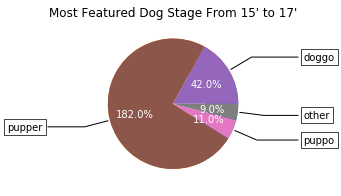

In [168]:
#Code help from matplotlib.org
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

#Set labels
labels = ['doggo', 'pupper', 'puppo', 'other']

#Pull values from master_clean
data = [42, 182, 12, 10]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(2*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Most Featured Dog Stage From 15' to 17'")

#Save as .png
plt.savefig('vocab.png', dpi=300)
plt.show()


In [169]:
source = master_clean.groupby('source')['source'].count()
source

deck = source.TweetDeck
web = source['Twitter Web Client']
iphone = source['Twitter for iPhone']
web

21

Below graph is pretty much pointless. Obviously, the vast majority of people are using twitter from their mobile device. 653 out of 659 posts!!

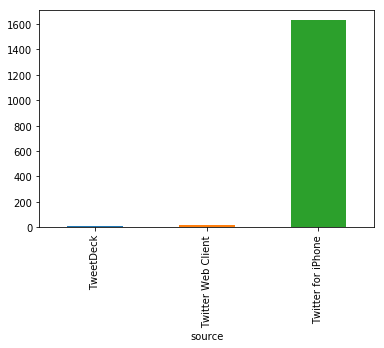

In [170]:
source.plot(kind='bar')

In [171]:
master_clean.head()

,tweet_id,jpg_url,img_num,breed,high_conf,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,454,2367,
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,39,110,
2,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,40,95,
3,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Nan,NaN,2015-11-16 00:35:11,Twitter for iPhone,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,759,1105,
4,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Golden Retriever,0.00795896,2015-11-16 00:55:59,Twitter for iPhone,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,a,121,261,


Next, I wondered **How strong is the correlation between retweet count and favorite count?**

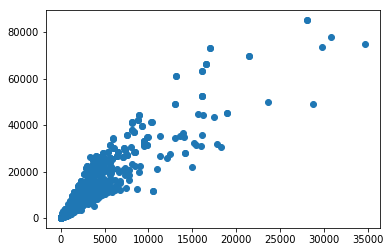

In [172]:
retweets = master_clean.retweet_count
favorites = master_clean.favorite_count
plt.scatter(retweets, favorites)

In [173]:
#Correlation is tweets between retweet_count and favorite_count
from scipy.stats.stats import pearsonr

#Pearson Correlation Coefficient
correlation = pearsonr(retweets, favorites)[0]
correlation

0.91506409115233778

**What is the most popular breed that is posted**

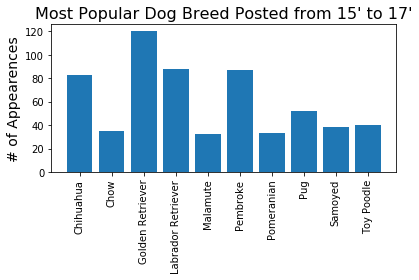

In [174]:
#Groupby breed, count and sort values
top_breeds = master_clean.groupby('breed')['breed'].count().sort_values(ascending=False).head(11)

#Plot
top10 = top_breeds[1:]
labels = ['Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua', 'Pug',
         'Toy Poodle', 'Samoyed', 'Chow', 'Pomeranian', 'Malamute']

plt.bar(labels, top10)
plt.xticks(rotation=90)
plt.ylabel('# of Appearences', size=14)
plt.title("Most Popular Dog Breed Posted from 15' to 17'", size=16)
plt.tight_layout()
plt.savefig('popular.png', dpi=300)


In [175]:
top10

breed
Golden Retriever      120
Labrador Retriever     88
Pembroke               87
Chihuahua              83
Pug                    52
Toy Poodle             40
Samoyed                38
Chow                   35
Pomeranian             33
Malamute               32
Name: breed, dtype: int64

**What breeds create the most retweets?**

This could help use boost our page numbers in the future as we know what our audience likes the most.

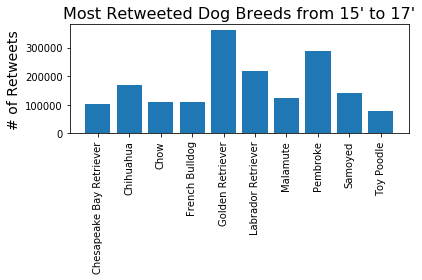

In [176]:
#Groupby breed, count retweets per breed and sort values
top_breeds = master_clean.groupby('breed')['retweet_count'].sum().sort_values(ascending=False).head(11)
top10 = top_breeds[1:]


#Plot in bar
top10 = top_breeds[1:]
labels = ['Golden Retriever', 'Pembroke', 'Labrador Retriever', 'Chihuahua', 'Samoyed',  
          'Malamute', 'French Bulldog', 'Chow', 'Chesapeake Bay Retriever', 'Toy Poodle']

plt.bar(labels, top10)
plt.xticks(rotation=90)
plt.ylabel('# of Retweets', size=14)
plt.title("Most Retweeted Dog Breeds from 15' to 17'", size=16)
plt.tight_layout()
plt.savefig('popular.png', dpi=300)
